Introduction to the analysis and what was the outcome of the experiment, and what model was selected , what were the initial  challenges and how did try to improve  the models




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix




# LOADING DATA

In [2]:
got_character = pd.read_excel('./datasets/GOT_character_predictions.xlsx')

got_dictionary = pd.read_excel('./datasets/GOT_data_dictionary.xlsx')

                              
# Display print out of dataset to understand the data

print(got_character.head())
print(got_dictionary.head())

   S.No           name title  male              culture  dateOfBirth mother  \
0  1739   Imry Florent   Ser     1                  NaN          NaN    NaN   
1  1233  Merianne Frey   NaN     0                  NaN        288.0    NaN   
2   998           Dolf   NaN     0  Vale mountain clans          NaN    NaN   
3    64          Quill   NaN     1             Braavosi          NaN    NaN   
4   334          Bandy   NaN     0             Northmen          NaN    NaN   

  father heir          house  ... isAliveMother  isAliveFather  isAliveHeir  \
0    NaN  NaN  House Florent  ...           NaN            NaN          NaN   
1    NaN  NaN     House Frey  ...           NaN            NaN          NaN   
2    NaN  NaN    Stone Crows  ...           NaN            NaN          NaN   
3    NaN  NaN            NaN  ...           NaN            NaN          NaN   
4    NaN  NaN    House Stark  ...           NaN            NaN          NaN   

   isAliveSpouse  isMarried  isNoble   age  numDea

In [3]:
got_character.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1739,Imry Florent,Ser,1,NaN,NaN,NaN,NaN,NaN,House Florent,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.183946,0
1,1233,Merianne Frey,NaN,0,NaN,288.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,NaN,0,0,17.0,0,0.083612,1
2,998,Dolf,NaN,0,Vale mountain clans,NaN,NaN,NaN,NaN,Stone Crows,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
3,64,Quill,NaN,1,Braavosi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
4,334,Bandy,NaN,0,Northmen,NaN,NaN,NaN,NaN,House Stark,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.020067,1


In [4]:
got_dictionary.head()

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measu...


# EDA & DP 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   male                        1946 non-null   int64  
 4   culture                     677 non-null    object 
 5   dateOfBirth                 433 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1519 non-null   object 
 10  spouse                      276 non-null    object 
 11  book1_A_Game_Of_Thrones     1946 non-null   int64  
 12  book2_A_Clash_Of_Kings      1946 non-null   int64  
 13  book3_A_Storm_Of_Swords     1946 

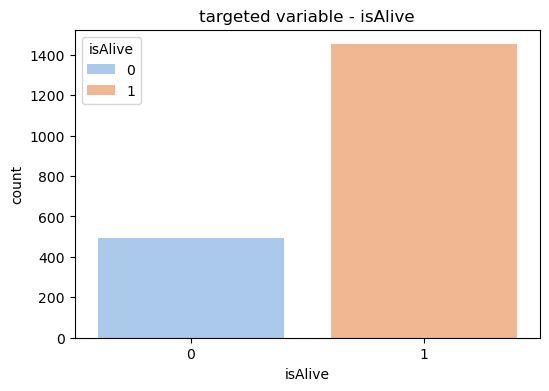

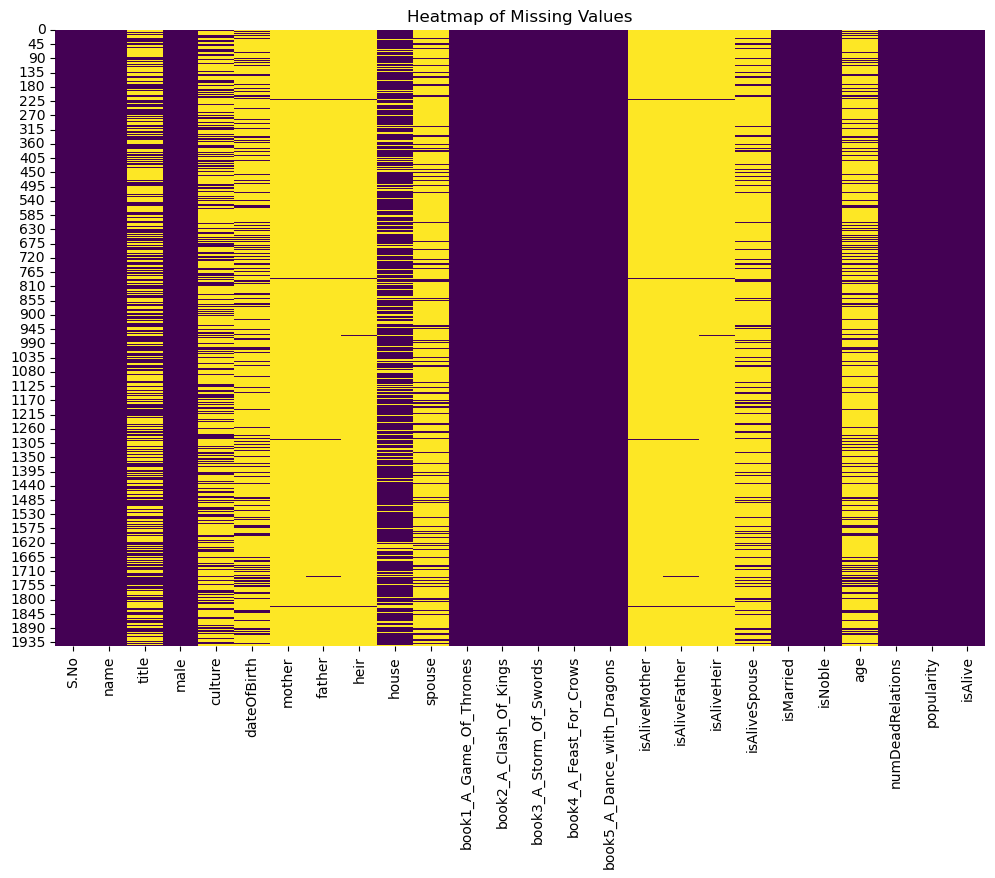

S.No                             0
name                             0
title                         1008
male                             0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# Description statitics with Data
got_character.info()
got_character.describe()

# Projection - targeted variable distribution which is 'isAlive'
plt.figure(figsize=(6, 4))
sns.countplot(data=got_character, x='isAlive',hue= 'isAlive', palette='pastel')
plt.title('targeted variable - isAlive')
plt.show()

# Detecting the missing values in the data 

missing_values = got_character.isnull().sum()

# Projecting missing values 

plt.figure(figsize=(12, 8))
sns.heatmap(got_character.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

missing_values

# ADDRESSING THE MISSING VALUES 

In [6]:
print(got_character.columns)

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones',
       'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
       'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')


In [7]:
# Drop columns with excessive missing values
drop_these_columns = ['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
got_character = got_character.drop(columns=drop_these_columns)

# Impute missing values for 'age' with the median
got_character['age'].fillna(got_character['age'].median(), inplace=True)

# Impute missing values for 'culture' and 'house' with the most used value
got_character['culture'].fillna(got_character['culture'].mode()[0], inplace=True)
got_character['house'].fillna(got_character['house'].mode()[0], inplace=True)

# Drop any remaining rows with missing values
got_character = got_character.dropna()

# Confirm no missing values remain
any_missing_values_after = got_character.isnull().sum()

# Display the cleaned data and check for missing values
got_character.head()
any_missing_values_after.head()

S.No       0
name       0
title      0
male       0
culture    0
dtype: int64


# FEATURE  ENGINEERING 

In [8]:
# Feature Engineering

# 1. Age Group
bins = [0, 13, 19, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
got_character['age_group'] = pd.cut(got_character['age'], bins=bins, labels=labels, right=False)

# 2. Total Books Appeared
got_character['total_books_appeared'] = got_character[['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons']].sum(axis=1)

# 3. Renowned Family (formerly Family Popularity)
renowned_family = got_character.groupby('house')['popularity'].transform('mean')
got_character['renowned_family'] = renowned_family


# Display the first few rows to confirm the new features
got_character.head()
got_character[['age_group', 'total_books_appeared', 'renowned_family']].head()

,age_group,total_books_appeared,renowned_family
25,Adult,5,0.478261
27,Adult,0,0.246656
36,Adult,5,0.498328
51,Adult,5,0.979933
90,Senior,5,0.147157


# Train and Test 


In [9]:
# Categorical variables encoded 
le = LabelEncoder()
got_character['title'] = le.fit_transform(got_character['title'])
got_character['culture'] = le.fit_transform(got_character['culture'])
got_character['house'] = le.fit_transform(got_character['house'])
got_character['spouse'] = le.fit_transform(got_character['spouse'])
got_character['age_group'] = le.fit_transform(got_character['age_group'])

# Define the features and target variable
X = got_character.drop(columns=['S.No', 'name', 'isAlive'])
y = got_character['isAlive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(random_state=42)
ridge = RidgeClassifier(random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Train the models
logreg.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gbm.fit(X_train, y_train)

# Evaluate the models
models = {
    'Logistic Regression': logreg,
    'Ridge Classifier': ridge,
    'K-Nearest Neighbors': knn,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'GBM': gbm
}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'Ridge Classifier', 'K-Nearest Neighbors']:
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, predictions)
    print(f"{model_name} ROC AUC: {roc_auc}")
    
    class_report = classification_report(y_test, predictions)
    print(f"Classification Report for {model_name}:")
    print(class_report)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n" + "-"*60 + "\n")

Logistic Regression ROC AUC: 0.4949494949494949
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20

Confusion Matrix:
[[4 5]
 [5 6]]

------------------------------------------------------------

Ridge Classifier ROC AUC: 0.6313131313131313
Classification Report for Ridge Classifier:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.64      0.82      0.72        11

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20

Confusion Matrix:
[[4 5]
 [2 9]]

--------------------------------

# FINAL MODEL SELECTION 


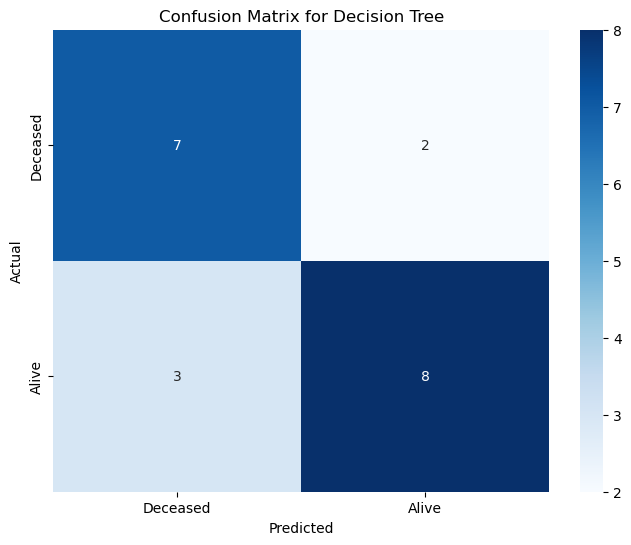

In [10]:
# Decision Tree ROC AUC: 0.7525252525252525
    

predictions = decision_tree.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()    

## Hyper Tunning The Selected Model 


In [11]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Model ROC AUC:", roc_auc_score(y_test, best_predictions))
print("Best Model Classification Report:")
print(classification_report(y_test, best_predictions))
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, best_predictions))


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best Model ROC AUC: 0.7323232323232324
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.71      0.91      0.80        11

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20

Confusion Matrix for Best Model:
[[ 5  4]
 [ 1 10]]


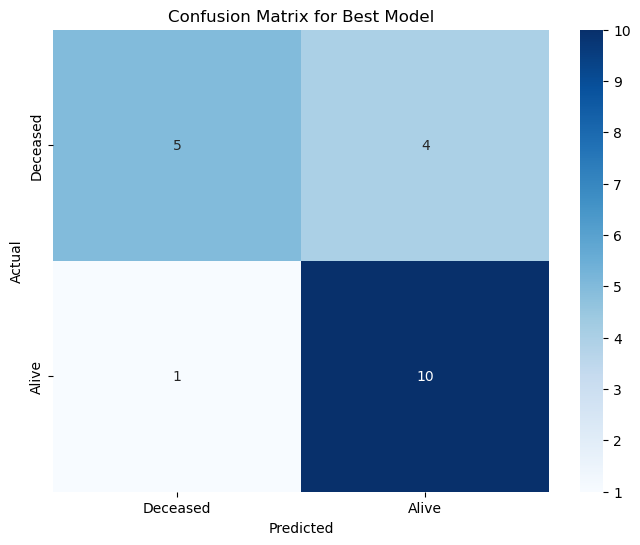

In [12]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()